<u><h1><center>**Walmart-Sales**

# <u> Part 1 : Import libraries and load the dataset

<u><h4>1.Import useful modules

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, accuracy_score, ConfusionMatrixDisplay

<u><h4>2.Load the data

In [2]:
# Import dataset
print ("Loading dataset....")
df=pd.read_csv("/Users/nadiapreuvot/Desktop/ML_projects/Walmart_Sales_project/Walmart_Store_sales.csv")
print ("...Done")
print()

Loading dataset....
...Done



# <u> Part 2 : Basic Exploration, Data Cleaning

<u><h4>1. Basic Exploration

In [3]:
# Basic stats
print ("Number of rows: {}".format(df.shape[0]))
print ("Number of columns: {}".format(df.shape[1]))
print()

print ("Display of dataset: ")
display(df.head())
print()
print()

print ("Basics statistics: ")
df_desc= df.describe(include="all")
display(df_desc)
print()

print ("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows: 150
Number of columns: 8

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092




Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The columns cover various information such as store locations (Store), dates (Date), weekly sales (Weekly_Sales), and environmental and economic factors (Temperature, Fuel_Price, CPI, Unemployment).</br>
</br>
The average weekly sales is approximately $1.25 million, with high variability (standard deviation approximately 647.463).</br> which indicates a high sales 
volume on average per week.</br>
</br>
The high variability of Weekly_Sales is a key point, as it suggests that sales are heavily influenced by varying factors, which could include store location, times of year, </br>holidays, local economic conditions (CPI , unemployment).
</br>
We also see that there are missing values ​​in several columns.

<u><h4>2. Data Cleaning

In [4]:
#Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
As weekly_sales being our target variable, It is crucial to deal with those missing value ( 9.33% missing values.)s we cannot use imputation technique on the target.</br>
It can create some biais, consequently we'll drop the lines with missing values.

In [5]:
# Drop lines with null values in Weekly_Sales column (our target variable)

df=df[~df["Weekly_Sales"].isnull()]

print("Dropping lines with missing values...")
print("...Done.")
print()

print ("Number of missing values in Weekly_Sales :{}".format (df["Weekly_Sales"].isnull().sum(axis = 0)))
print()

print ("Percentage of missing values for Weekly_Sales: ")

percent_Weekly_Sales = (100*df.iloc[:,2].isnull().sum()/df.shape[0])
print (percent_Weekly_Sales)
print()
print ("Number of rows: {}".format(df.shape[0]))


Dropping lines with missing values...
...Done.

Number of missing values in Weekly_Sales :0

Percentage of missing values for Weekly_Sales: 
0.0

Number of rows: 136


</u><ins> <font color="bleu"><ins>NOTE</font></u> </ins> Now, we will convert the column "Date" to datetime type (day/month/year) and as a consequence create the following columns : "Year", "Month", "Day", "Day_of_week".



In [6]:
# Let's convert [date] column into a datetime type
print("Converting Date object into datetime...")
print("...Done.") 

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df["Date"].head()

Converting Date object into datetime...
...Done.


0   2011-02-18
1   2011-03-25
3          NaT
4   2010-05-28
5   2010-05-28
Name: Date, dtype: datetime64[ns]

In [7]:
# Spliting Date column into 4 new columns
df["Year"],df["Month"],df["Day"], df["Day_of_week"]=df["Date"].dt.year, df["Date"].dt.month, df["Date"].dt.day, df["Date"].dt.weekday

# Deleting date column
df = df.drop(df.columns[1], axis=1)

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


</u><ins> <font color="bleu"><ins>NOTE</font></u> </ins> In this project, is considered as outliers all the numeric features that do not fall within the range : [X̄ - 3σ, X̄ + 3σ].</br>
This concerns the columns : "Temperature", "Fuel_price", "CPI" and "Unemployment".</br>
For that reason, we will drop those concerned lines.

In [8]:
# Handling the outliers for all the numerical columns

print('Dropping outliers in Temperature, Fuel_Price, CPI, Unemployment...')
print()

columns = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]
for column in columns:
    mean = df[column].mean()
    std = df[column].std()
    df = df.drop(df[(df[column] < mean - 3*std) | (df[column] > mean + 3*std)].index)
df.shape

print('Done. Number of lines remaining : ', df.shape[0])
print()

Dropping outliers in Temperature, Fuel_Price, CPI, Unemployment...

Done. Number of lines remaining :  131



</u><ins> <font color="bleu"><ins>NOTE</font></u> </ins> In our approach, which is more conservative, help us to maintain as much data as possible while removing the outliers specific to each variable, knowing that the different variables have linear relationships and that they are therefore independent.</br> 
This code iterates through the specified columns and calculates the mean and standard deviation for each.</br>
It then removes the outliers from each column; each iteration of this block operates on the original DataFrame. </br>
This means that outliers are removed independently for each column, without affecting the calculations of other columns.</br>
</br>

We could have had an another approach by filtering outliers cumulatively, we take into account the overall impact of outliers on the dataset.</br>
This method may lead to greater data removal.</br>
If a row is an outlier in a column, it is removed before moving on to parsing subsequent columns,</br>
which may not be desirable if this line is representative for the other variables.</br>
With this method too many lines were removed, our dataset only contained 90 rows.




We also could have visualized the outliers using boxplot graph for each variable.

# <u> Part 3 : EDA : EXPLORATORY DATA ANALYSIS </u>

<u><h5>1. Weekly Sales

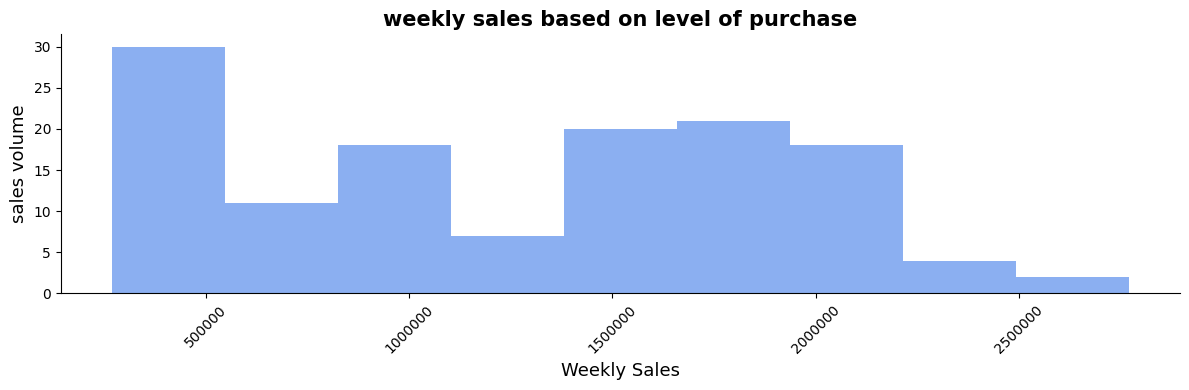

In [9]:
# Visualization of Weekly_sales 
plt.figure(figsize=(12, 4), dpi=100)  
sns.histplot(df['Weekly_Sales'], color='cornflowerblue', edgecolor='none') 
plt.title('weekly sales based on level of purchase', fontsize=15, fontweight='bold') 
plt.xlabel('Weekly Sales', fontsize=13)  
plt.ylabel('sales volume', fontsize=13)  
plt.ticklabel_format(style='plain', axis='x')  # Empêche l'affichage en notation scientifique
sns.despine()  # bordure
plt.xticks(rotation=45)  # Rotation des labels
plt.tight_layout() 
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The distribution appears to be asymmetric, meaning that there is a higher frequency of weeks with lower sales and less frequency of weeks with very high sales.This suggests that while the majority of weekly sales data is concentrated around a lower range, there are several weeks where sales have been exceptionally high.
There are notable peaks in the distribution, indicating sales values ​​around which a relatively high number of weeks cluster. For example, there appears to be a peak where there have been 30 weeks where the weekly sales have been around 500.000$, which could indicate a common weekly sales amount for a significant number of stores or periods.

<u><h5>2. Weekly Sales by Year

/var/folders/jw/qbrcjm2d74q5jys1_v4zld800000gn/T/ipykernel_1993/1155559994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Weekly_Sales', data=sales_by_year, palette='coolwarm')


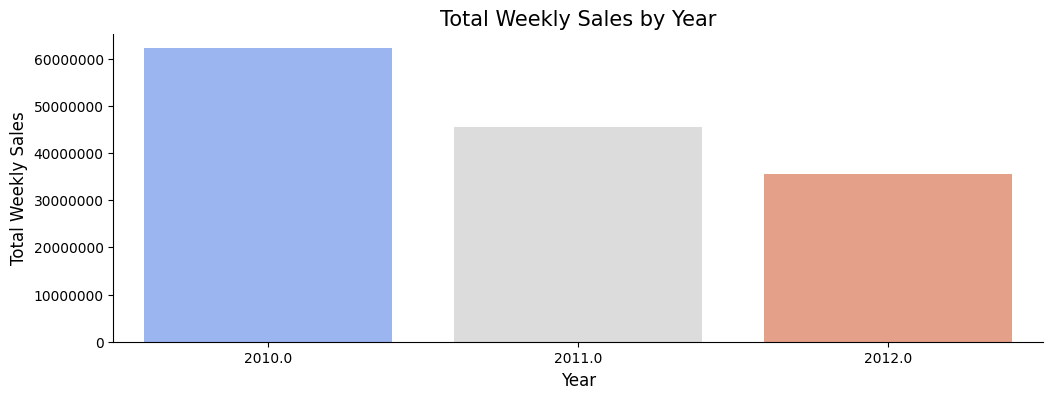

In [10]:
# Create bar chart for total weekly sales by year
sales_by_year = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 4))
sns.barplot(x='Year', y='Weekly_Sales', data=sales_by_year, palette='coolwarm')
plt.title('Total Weekly Sales by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Weekly Sales', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  # pas de notation scientifique
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()  # Retire les bordures 
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The bar chart shows a decrease in total sales year over year, which may indicate economic challenges, changes in consumer habits, </br>or other external factors influencing Walmart store performance.



<u><h5>3. Weekly Sales by Month

In [11]:
fig = px.bar(df, x='Month', y='Weekly_Sales', title='Weekly Sales / Month', labels={'Date': 'Date', 'Weekly_Sales': 'Weekly Sales'})
fig.show()

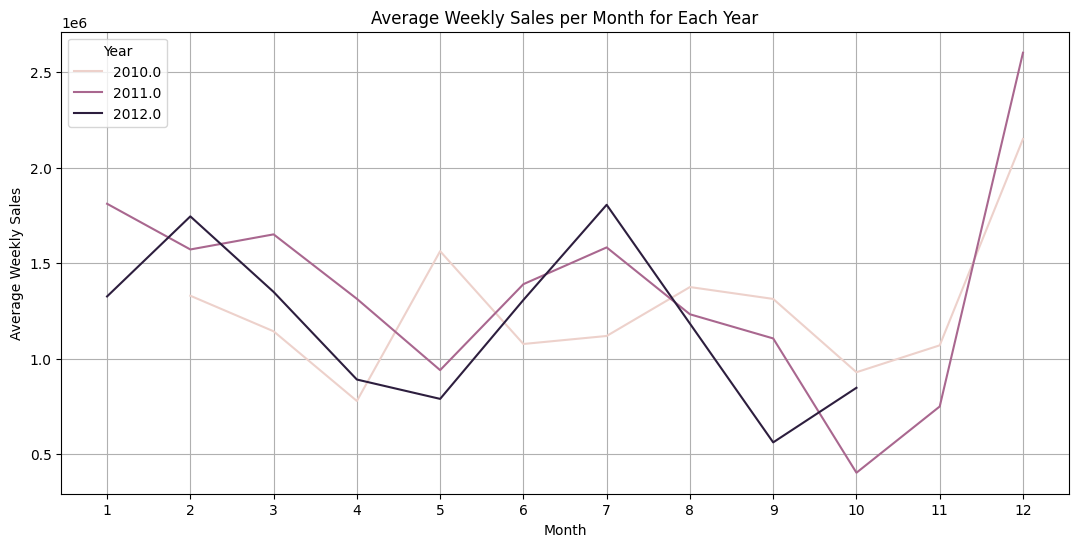

In [12]:
# Plotting monthly sales for each year
plt.figure(figsize=(13, 6))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df, estimator='mean', errorbar=None)
plt.title('Average Weekly Sales per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
This chart plots Walmart's average weekly sales for each month over three different years.</br>
There appears to be a clear seasonal trend with sales increasing significantly towards the end of the year, likely due to the holiday season.</br>
Monthly sales fluctuate throughout the year, with notable low points in April and July for 2011 and 2012.</br>
Monthly sales decline in August for 2010 and 2012. In particularly in September and October for the year 2011. we do not have any records for 2012.</br>

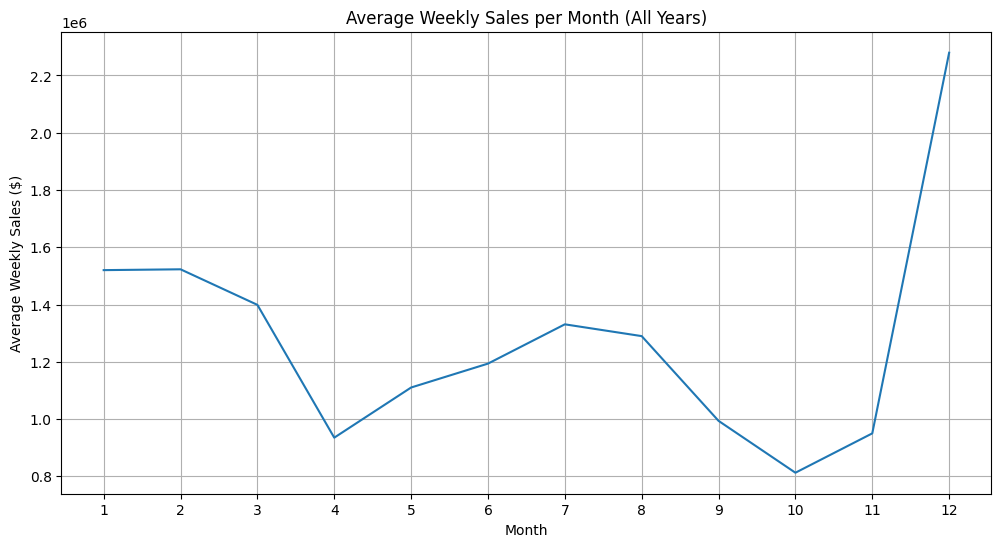

In [13]:
# Average Weekly Sales per Month for the years 
# Plotting monthly sales across all years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Weekly_Sales', data=df, estimator='mean', errorbar=None)
plt.title('Average Weekly Sales per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
We can notice a decline of the weekly sales in April and another one starting from August to October and finally a significant rise in November/ December.</br> 
Clearly, the holiday season has a positive impact on sales, with the highest sales occurring during the Christmas season.

<u><h5>4. Weekly Sales by Day

In [14]:
# Weekly sales by day in the month
fig = px.bar(df, x='Day', y='Weekly_Sales', title='Weekly Sales / Day')
fig.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

-  <ins>Weekly_Sales by day of Month</ins>:There is notable day-to-day variability, with some spikes that could correspond to paydays or other regular events that prompt consumers to spend more.


<u><h5>5. Weekly Sales by Day of Week

In [15]:
# Weekly sales by day of week
fig = px.scatter(df, x='Day_of_week', y='Weekly_Sales', title='Weekly Sales / Day of week', labels={'Date': 'Date', 'Weekly_Sales': 'Weekly Sales'})
fig.show()

<u><h5>6. Weekly Sales per Store

In [16]:
# Weekly sales per store
fig = px.scatter(df, x='Store', y=['Weekly_Sales'], title='Weekly Sales per Store')
fig.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

 There is great variability in sales between stores. </br>
 Some stores have much higher sales than others.</br>
 Some stores (like those numbered 3, 5, 9 and 16) have relatively low average sales compared to others. </br>Others, like stores 2, 4, 10, 13, 14 and 20, stand out with significantly higher average sales.</br>
 Implications for Retail Strategy: Stores with high average sales could be key selling points or located in high traffic or high demand areas.</br>
  Stores with low sales might need attention in terms of promotion or management improvement.</br>
 The distribution of average weekly sales is not uniform and indicates some heterogeneity in store performance.</br>
 This may reflect diversity in store characteristics, such as size, location, customer demographics, local competition, and management operations.


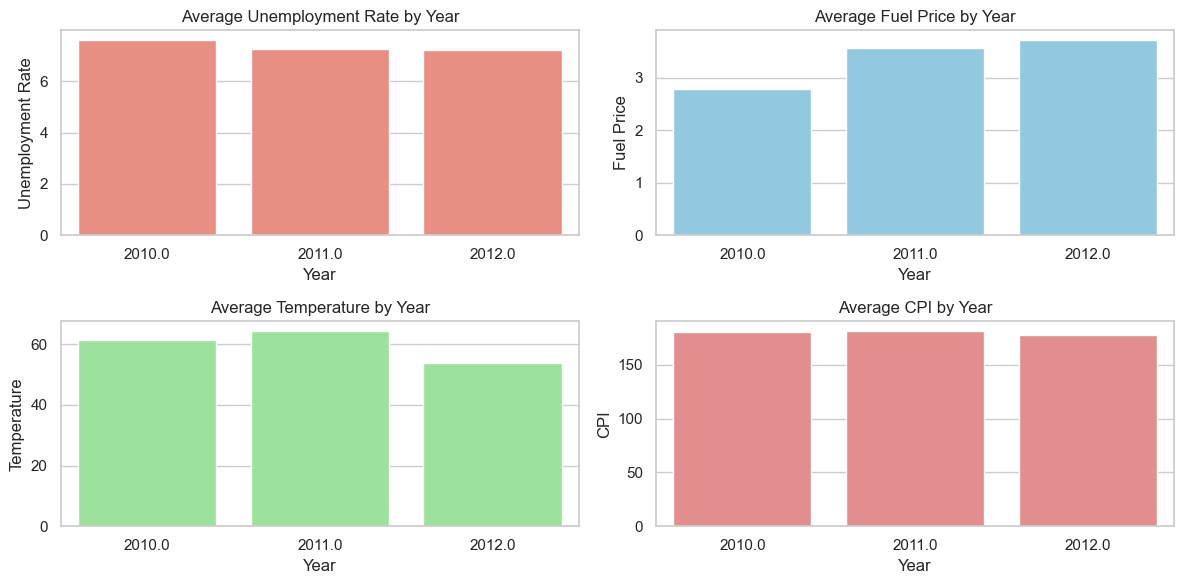

In [17]:
# Creating a 2x2 Figure and Set of Subgraphs
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Data preparation
unemployment_by_year = df.groupby('Year')['Unemployment'].mean().reset_index()
fuel_price_by_year = df.groupby('Year')['Fuel_Price'].mean().reset_index()
temperature_by_year = df.groupby('Year')['Temperature'].mean().reset_index()
cpi_by_year = df.groupby('Year')['CPI'].mean().reset_index()

# Unemployment Rate by Year
sns.barplot(x='Year', y='Unemployment', data=unemployment_by_year, ax=axs[0, 0], color='salmon')
axs[0, 0].set_title('Average Unemployment Rate by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Unemployment Rate')

# Fuel Price by Year
sns.barplot(x='Year', y='Fuel_Price', data=fuel_price_by_year, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Average Fuel Price by Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Fuel Price')

# Temperature by Year
sns.barplot(x='Year', y='Temperature', data=temperature_by_year, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Average Temperature by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Temperature')

# CPI by Year
sns.barplot(x='Year', y='CPI', data=cpi_by_year, ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Average CPI by Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('CPI')

plt.tight_layout()
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
<ins>Analysis for the variables:</ins>
-  <ins>Unemployment Rate</ins>: Declining unemployment rates over time could indicate improving economic conditions, which is generally associated with increased consumption. 

-  <ins>Fuel_Price</ins>: It is ncreasing every year and could have an impact on logistics costs and consumer purchasing habits.</br>
-  <ins>Temperature</ins>:Temperature variations do not show a clear trend in weekly sales. This could mean that temperature is not a major determining factor for Walmart's weekly sales
-  <ins>CPI</ins>: The Consumer Price Index (CPI) has very slighlty decreased over the years 

<u><h5>7. Weekly Sales & Holiday

In [18]:
# weekly Sales & Holiday
fig = px.scatter(data_frame=df, x='Holiday_Flag', y='Weekly_Sales', title='Weekly Sales / Holiday')
fig.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
-  <ins>Holiday_Flag</ins>:It appears that average sales during weeks with a holiday are lower, which could indicate that holidays have a negative impact on sales.</br> 

<u><h5>8. Weekly Sales & Temperature

In [19]:
fig = px.scatter(df, x='Temperature', y='Weekly_Sales', title='Weekly Sales / Temperature', color='Weekly_Sales')
fig.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

"This scatter plot visualizes the relationship between temperature and weekly sales at Walmart. The data points, colored based on sales volume, suggest that there might be a pattern where sales peak at moderate temperatures, but no clear linear relationship is evident between temperature and sales volume, indicating variability in how weather conditions might influence shopping behavior."

<u><h5>9. Weekly Sales & Fuel Price

In [20]:
# Weekly Sales & Fuel Price
fig = px.scatter(data_frame=df, x='Fuel_Price', y='Weekly_Sales', title='Weekly Sales / Fuel Price')
fig.show()

Let's create bins to better visualise the tendency 

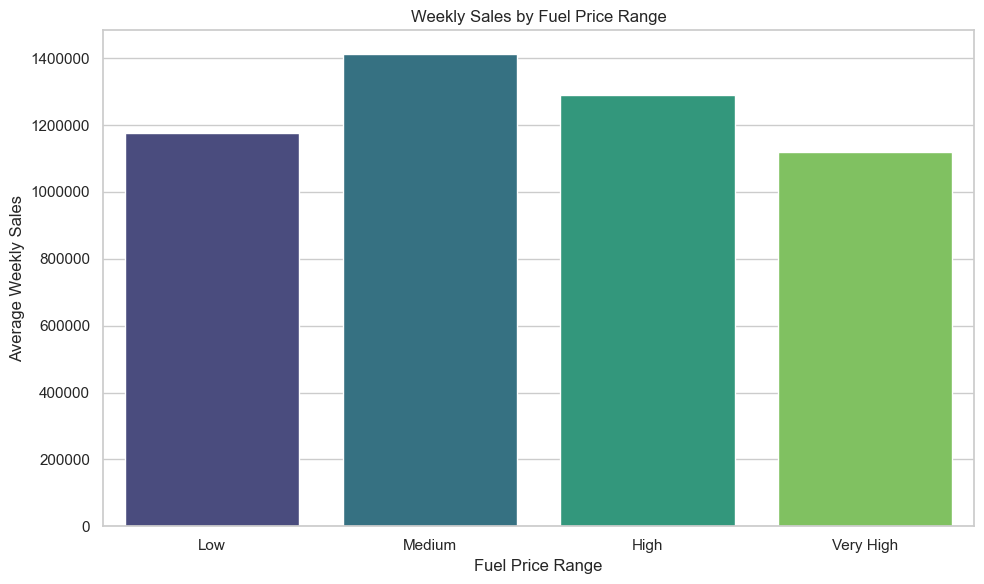

In [21]:
# Create a copy of the DataFrame to preserve the original data
df_copy = df.copy()

# Create bins in the copy of the DataFrame for fuel price
df_copy['Fuel_Price_Bin'] = pd.cut(df_copy['Fuel_Price'], bins=4, labels=["Low", "Medium", "High", "Very High"])

# Group data by the new fuel price bins and calculate the mean weekly sales
# Specify observed=True to avoid the FutureWarning and ensure compatibility with future versions of pandas
sales_by_fuel_price_bin = df_copy.groupby('Fuel_Price_Bin', observed=True)['Weekly_Sales'].mean().reset_index()

# Create a bar plot for weekly sales by fuel price range
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Fuel_Price_Bin', y='Weekly_Sales', data=sales_by_fuel_price_bin, palette='viridis', hue='Fuel_Price_Bin', legend=False)
plt.title('Weekly Sales by Fuel Price Range')
plt.xlabel('Fuel Price Range')
plt.ylabel('Average Weekly Sales')
plt.ticklabel_format(style='plain', axis='y')

# Remove the hue legend since it's redundant
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

-  <ins>Weekly_Sales by fuel price range</ins>: appears that sales are higher when fuel prices are in the “Medium” range. In fact, when fuel is very high, weekly sales are less important

<u><h5>10. Weekly Sales & CPI

In [22]:
# fig = px.scatter(df, x='CPI', y='Weekly_Sales', title='Weekly Sales / CPI')
fig = px.pie(df, values='Weekly_Sales', names='Store', title='Weekly Sales / CPI', hole=.3)
fig.update_traces(sort=False, insidetextorientation='radial', textinfo='value+percent')
fig.show()

<u><h5>11. Weekly Sales & Unemployment


In [23]:
fig = px.histogram(df, x='Unemployment', y='Weekly_Sales', title='Weekly Sales Over Time')
fig.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>

This histogram illustrates the relationship between unemployment rates and total weekly sales at Walmart. It provides a visual summary of how sales volumes fluctuate across different unemployment rate intervals, helping to identify trends or patterns in sales performance relative to economic conditions

<u><h5>12.Confusion Matrix

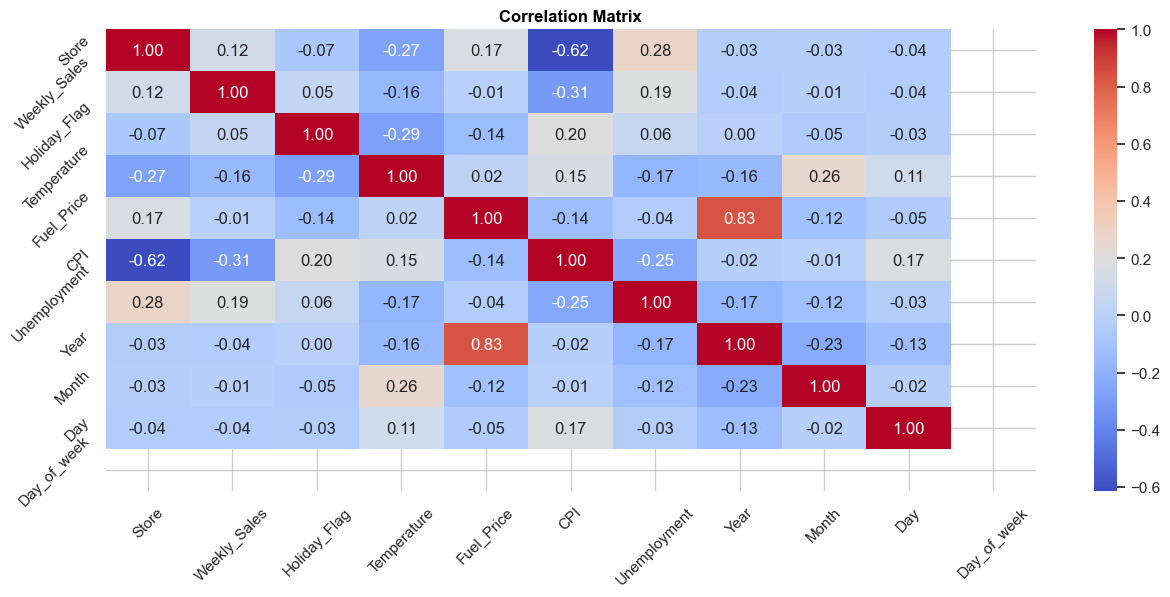

In [24]:
# Select only the numeric columns of the DataFrame for the correlation calculation
df_numeric = df.select_dtypes(include=['number'])

# Calculation of correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Visualizing the correlation matrix with seaborn
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
- <ins>Weekly_Sales</ins>: Weekly sales do not show a strong correlation with the other variables, with the coefficients remaining around 0.12 with the Store variable and lower for the other variables.
- <ins>Fuel_Price and Year</ins>: A strong positive correlation (0.83) between fuel price and year suggests that fuel price has increased over the years.
-  <ins>CPI and Store</ins>: There is a strong negative correlation (-0.62) between the CPI (Consumer Price Index) and the Store variable, which could suggest that some stores are located in areas with different price indices.
-  <ins>Weekly Sales and CPI</ins>: There appears to be a moderate negative correlation(-0.31) between the CPI and Weekly_Sales, which may suggest that sales decline as the CPI increases, perhaps due to inflation or other economic factors affecting the purchasing power of consumers.

- <ins>Temperature and Year</ins>: The negative correlation (−0.15) between temperature and year could indicate a trend in the data collected or seasonal variability over the years.

- <ins>Temporal Variables (Year, Month, Day, Day_of_week)</ins>: Interestingly, variables derived from date do not show a significant correlation with weekly sales, although month shows a slightly positive correlation (0.26) with temperature , which makes sense from a seasonal perspective.</br>
</br>
No Obvious Multicollinearity, with a few exceptions, most variables do not show strong correlations with each other, which is good for modeling because it suggests little multicollinearity.

# <u> Part 4 : Preprocessing

In [25]:
# Separate target variable Y from features X
target_variable= "Weekly_Sales"

print('Separating labels from features...')

Y= df.loc[ : , target_variable]
X= df.drop(target_variable , axis =1)

print("...Done")
print()

print("Y: ")
print(Y.head())
print()
print("X: ")
X.head()

Separating labels from features...
...Done

Y: 
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

X: 


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [26]:
# Preprocessing with Scikit-Learn
print ("Dividing into train and test sets ...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 )
print("...Done.")
print()

Dividing into train and test sets ...
...Done.



In [27]:
# Create pipeline for numeric features

numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year',
                    'Month', 'Day', 'Day_of_week'] # Names of numeric columns in X_train/X_test
###
numeric_transformer = Pipeline(steps =[
    ("imputer" , SimpleImputer( strategy = "mean")), # missing values will be replaced by columns,here we use mean cause we removed the outliers
    ("scaler", StandardScaler())
])

# Create pipeline for categorical features

categorical_features = ["Store", "Holiday_Flag"] # Names of categorical columns in X_train/X_test

categorical_transformer = Pipeline(steps =[
    ("imputer" , SimpleImputer( strategy= "most_frequent")), # missing values will be replaced by most frequent value
    ("encoder" , OneHotEncoder( drop = "first")) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

# Preprocessing on train set

print("Performing preprocessings on train set...")
print()
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()
print()

# Preprocessings on test set

print("Performing preprocessings on test set...")
print()
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print(X_test)
print()

Performing preprocessings on train set...

     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
136    4.0           NaN        84.59       3.469  129.112500         5.644   
78     1.0           0.0        62.25       3.308  218.220509         7.866   
17    18.0           0.0        21.33       2.788  131.527903         9.202   
108   18.0           0.0        69.12       2.906  132.293936           NaN   
141    5.0           0.0        62.37         NaN  212.560411         6.768   

       Year  Month   Day  Day_of_week  
136  2011.0    7.0   8.0          4.0  
78   2011.0   11.0  18.0          4.0  
17      NaN    NaN   NaN          NaN  
108  2010.0    5.0  28.0          4.0  
141  2010.0   11.0  12.0          4.0  
...Done.
[[ 1.47125449  0.34231519 -1.33363663 -1.83554421  0.19302754  0.21122551
  -1.15780865  0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          

# <u> A : Train a Baseline Model : Linear Regression

<u><h4>1.Train Model

In [28]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("....Done.")

Train model...
....Done.


<u><h4> 2. Performance assessment

In [29]:
#Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
#print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
#print(Y_test_pred)
print()

#Print R^2 scores
print ("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

Predictions on training set...
...Done.

Predictions on test set...
...Done.

R2 score on training set :  0.9731935046590678
R2 score on test set :  0.9344654257543308


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The R² scores we obtained for our linear regression model are quite high, indicating that our model is performing well.</br>
- <ins>R² on the training set (0.9731)</ins>: This suggests that the model explains approximately 97.31% of the sales variance in the training set.</br>
- <ins>R² on the test set (0.9345)</ins>: The model explains approximately 93.45% of the variance in sales in the test set.</br>
<br>
A much higher R² score on the training set than on the testing set could indicate overfitting, but in our case the difference is not very big.

<u><h4>3. Interpreting the model's coefficients

In [30]:
# Get columns_names of each coefficient

column_names = []
for name, transformer, feature_names in preprocessor.transformers_: 
    if name == "num": # # if pipeline is for numeric variables
        column_names.extend(feature_names)
    elif name == "cat":  # if pipeline is for categorical variables, get the names from OneHot
        categories = transformer.named_steps['encoder'].get_feature_names_out(feature_names)# get output columns names from OneHotEncoder
        column_names.extend(categories)  # concatenate categories names

print("Column names corresponding to each coefficient :", column_names)

Column names corresponding to each coefficient : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_week', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [31]:
# Create a pandas DataFrame that organizes and ranks the coefficients of the linear regression model by their importance
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients', ascending=False)
feature_importance

,coefficients
Store_5.0,1.402927e+06
Store_9.0,1.268176e+06
Store_3.0,1.251809e+06
Store_16.0,1.107620e+06
Store_7.0,8.895462e+05
Store_8.0,7.549198e+05
Store_14.0,7.221994e+05
Store_10.0,6.777156e+05
Store_15.0,6.723676e+05
Store_17.0,6.677303e+05


In [32]:
# Display the Features Importance 

# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# <u> B :Train a regularized regression model

<u><h4>1. Ridge Regularization

1. Cross-validated score for a Ridge model

In [34]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("3-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.8187495182769385
The standard deviation is :  0.02867296170748108


2.Grid search : tune λ

In [35]:
# Perform grid search
print("Grid search...")

ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100] 
}
gridsearch_ridge = GridSearchCV(ridge, param_grid = params, cv = 10, verbose=1) # cv : the number of folds to be used for CV
gridsearch_ridge.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_ridge.best_params_)
print("Best R2 score : ", gridsearch_ridge.best_score_)

Grid search...
Fitting 10 folds for each of 9 candidates, totalling 90 fits
...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9406414151241191


3.Performance assessment

In [36]:
# Performance assessment, Print R^2 scores

print("R2 score on training set : ", gridsearch_ridge.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_ridge.score(X_test, Y_test))

R2 score on training set :  0.9731756355275908
R2 score on test set :  0.9358630190131586


<u><h4>2. Lasso Regularization

1. Cross-validated score for a Lasso model

In [37]:
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Lasso model
print("3-fold cross-validation...")
regressor = Lasso()
scores = cross_val_score(regressor, X_train, Y_train, cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

3-fold cross-validation...
The cross-validated R2-score is :  0.9334164025318774
The standard deviation is :  0.010834362833839048


2.Grid search : tune λ

In [38]:
# Perform grid search
print("Grid search...")

lasso = Lasso()
# Grid of values to be tested
params = {
    'alpha': [1, 2, 3, 5, 10, 20, 30, 50]
}
gridsearch_lasso = GridSearchCV(lasso, param_grid = params, cv = 10, verbose=1) 
gridsearch_lasso.fit(X_train, Y_train)

print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)



Grid search...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
...Done.
Best hyperparameters :  {'alpha': 50}
Best R2 score :  0.940805207779254


3.Performance assessment

In [39]:
# Performance assessment, Print R^2 scores

print("R2 score on training set : ", gridsearch_lasso.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch_lasso.score(X_test, Y_test))

R2 score on training set :  0.9731872541644571
R2 score on test set :  0.9355755315558347


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
Both models show comparable performance in terms of R² score.</br>
This suggests that both models are effective for this dataset and that there is no major difference in their ability to predict weekly sales.</br>
The consistency of the cross-validation R² scores with the R² scores on the test set indicates that both models generalize well and that there is no significant overfitting.